In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
print ('Setup complete')

Setup complete


In [2]:
from numpy import mean

In [3]:
record = pd.read_excel("/home/adenov/Documents/DataScience/Movegreen'sData/records.xlsx")

In [4]:
record_2 = pd.read_excel("/home/adenov/Documents/DataScience/Movegreen'sData/Бишкек сент-ноя.xlsx", sheet_name = 'данные')

In [5]:
record['recdate'] = pd.to_datetime(record['recdate'])

In [6]:
#important step to divide the date by time and date
record['date'] = [d.date() for d in record['recdate']]
record['time'] = [d.time() for d in record['recdate']]

In [7]:
#important step to divide the date by time and date
record_2['new_date'] = [d.date() for d in record_2['date']]
record_2['time'] = [d.time() for d in record_2['date']]

In [8]:
record = record.drop(columns = {'temp', 'co2', 'pm10'})

In [9]:
record_2 = record_2.drop(columns = {'lat','lng'})

In [10]:
record_2 = record_2.rename(columns = {'номер записи':'id', 
                                      'номер сенсора':'sensorid', 
                                      'date':'recdate', 
                                      'new_date':'date'})

In [11]:
record.head(5)

,id,sensorid,recdate,pm25,date,time
0,1745636,2001,2018-11-20 00:00:09,158,2018-11-20,00:00:09
1,1745637,2002,2018-11-20 00:00:09,137,2018-11-20,00:00:09
2,1745638,2004,2018-11-20 00:00:09,28,2018-11-20,00:00:09
3,1745643,2005,2018-11-20 00:00:10,639,2018-11-20,00:00:10
4,1745645,2003,2018-11-20 00:00:11,117,2018-11-20,00:00:11


In [12]:
record_2.head(5)

,id,sensorid,recdate,pm25,date,time
0,12680410,2001,2018-08-19 12:49:09,4,2018-08-19,12:49:09
1,12680436,2001,2018-08-19 12:50:11,5,2018-08-19,12:50:11
2,12680455,2001,2018-08-19 12:51:10,5,2018-08-19,12:51:10
3,12680479,2001,2018-08-19 12:52:11,5,2018-08-19,12:52:11
4,12680497,2001,2018-08-19 12:53:09,5,2018-08-19,12:53:09


In [11]:
record.sensorid.value_counts()

2004    37938
2002    36486
2001    34942
2006    30857
2003    26813
2008    24697
2005    18596
Name: sensorid, dtype: int64

In [19]:
record_2['номер сенсора'].value_counts()

2003    76040
2004    74780
2005    48373
2008    48133
2002    47074
2006    42115
2001    41232
2007       10
Name: номер сенсора, dtype: int64

In [12]:
sensor_2001 = record[record['sensorid'] == 2001]

In [13]:
record_2 = record_2.append(record, ignore_index = True)

In [14]:
sensor01 = record_2[record_2['sensorid'] == 2001]
sensor02 = record_2[record_2['sensorid'] == 2002]
sensor03 = record_2[record_2['sensorid'] == 2003]
sensor04 = record_2[record_2['sensorid'] == 2004]
sensor05 = record_2[record_2['sensorid'] == 2005]
sensor06 = record_2[record_2['sensorid'] == 2006]
sensor08 = record_2[record_2['sensorid'] == 2008]

In [36]:
by_month_01 = sensor01.groupby(sensor01['recdate'].dt.strftime('%B'))['pm25'].mean()
by_month_02 = sensor02.groupby(sensor02['recdate'].dt.strftime('%B'))['pm25'].mean()
by_month_03 = sensor03.groupby(sensor03['recdate'].dt.strftime('%B'))['pm25'].mean()
by_month_04 = sensor04.groupby(sensor04['recdate'].dt.strftime('%B'))['pm25'].mean()
by_month_05 = sensor05.groupby(sensor05['recdate'].dt.strftime('%B'))['pm25'].mean()
by_month_06 = sensor06.groupby(sensor06['recdate'].dt.strftime('%B'))['pm25'].mean()
by_month_08 = sensor08.groupby(sensor08['recdate'].dt.strftime('%B'))['pm25'].mean()

In [41]:
by_month_01 =pd.Series(by_month_01, name = '2001')
by_month_02 =pd.Series(by_month_02, name = '2002')
by_month_03 =pd.Series(by_month_03, name = '2003')
by_month_04 =pd.Series(by_month_04, name = '2004')
by_month_05 =pd.Series(by_month_05, name = '2005')
by_month_06 =pd.Series(by_month_06, name = '2006')
by_month_08 =pd.Series(by_month_08, name = '2008')

In [49]:
by_month = pd.concat([by_month_01, 
                      by_month_02,
                      by_month_03, 
                     by_month_04,
                     by_month_05, 
                     by_month_06,
                     by_month_08], axis =1, sort =False )

In [53]:
by_month = by_month.reindex(index = ['August', 'September', 'October', 'November', 'December'])

In [62]:
by_month.to_excel("/home/adenov/Documents/DataScience/Movegreen'sData/by_month.xlsx")

In [56]:
by_day_01 = sensor01.groupby(sensor01.date)['pm25'].mean()
by_day_02 = sensor02.groupby(sensor02.date)['pm25'].mean()
by_day_03 = sensor03.groupby(sensor03.date)['pm25'].mean()
by_day_04 = sensor04.groupby(sensor04.date)['pm25'].mean()
by_day_05 = sensor05.groupby(sensor05.date)['pm25'].mean()
by_day_06 = sensor06.groupby(sensor06.date)['pm25'].mean()
by_day_08 = sensor08.groupby(sensor08.date)['pm25'].mean()

In [58]:
by_day_01 =pd.Series(by_day_01, name = '2001')
by_day_02 =pd.Series(by_day_02, name = '2002')
by_day_03 =pd.Series(by_day_03, name = '2003')
by_day_04 =pd.Series(by_day_04, name = '2004')
by_day_05 =pd.Series(by_day_05, name = '2005')
by_day_06 =pd.Series(by_day_06, name = '2006')
by_day_08 =pd.Series(by_day_08, name = '2008')

In [59]:
by_day = pd.concat([by_day_01, 
                      by_day_02,
                      by_day_03, 
                     by_day_04,
                     by_day_05, 
                     by_day_06,
                     by_day_08], axis =1)

/home/adenov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [61]:
by_day.isnull().sum()

2001    31
2002    19
2003     9
2004     4
2005    22
2006    19
2008    15
dtype: int64

In [63]:
by_day.to_excel("/home/adenov/Documents/DataScience/Movegreen'sData/by_day.xlsx")

In [64]:
by_day.shape

(86, 7)

In [66]:
avg_twenty_01 = sensor01.resample(rule='20Min', on='recdate')['pm25'].mean()
avg_twenty_02 = sensor02.resample(rule='20Min', on='recdate')['pm25'].mean()
avg_twenty_03 = sensor03.resample(rule='20Min', on='recdate')['pm25'].mean()
avg_twenty_04 = sensor04.resample(rule='20Min', on='recdate')['pm25'].mean()
avg_twenty_05 = sensor05.resample(rule='20Min', on='recdate')['pm25'].mean()
avg_twenty_06 = sensor06.resample(rule='20Min', on='recdate')['pm25'].mean()
avg_twenty_08 = sensor08.resample(rule='20Min', on='recdate')['pm25'].mean()

In [15]:
avg_hour_01 = sensor01.resample(rule='60Min', on='recdate')['pm25'].mean()
avg_hour_02 = sensor02.resample(rule='60Min', on='recdate')['pm25'].mean()
avg_hour_03 = sensor03.resample(rule='60Min', on='recdate')['pm25'].mean()
avg_hour_04 = sensor04.resample(rule='60Min', on='recdate')['pm25'].mean()
avg_hour_05 = sensor05.resample(rule='60Min', on='recdate')['pm25'].mean()
avg_hour_06 = sensor06.resample(rule='60Min', on='recdate')['pm25'].mean()
avg_hour_08 = sensor08.resample(rule='60Min', on='recdate')['pm25'].mean()

In [16]:
avg_hour_01 =pd.Series(avg_hour_01, name = 'Восток -5')
avg_hour_02 =pd.Series(avg_hour_02, name = 'Ош б-р')
avg_hour_03 =pd.Series(avg_hour_03, name = 'Боконбаева/К.Акиева')
avg_hour_04 =pd.Series(avg_hour_04, name = 'Кок-Жар')
avg_hour_05 =pd.Series(avg_hour_05, name = 'Ак-Орго')
avg_hour_06 =pd.Series(avg_hour_06, name = '7-мкр')
avg_hour_08 =pd.Series(avg_hour_08, name = 'К.Аскер')

In [17]:
avg_hour = pd.concat([avg_hour_01, 
                      avg_hour_02,
                      avg_hour_03, 
                      avg_hour_04,
                      avg_hour_05, 
                      avg_hour_06,
                      avg_hour_08], axis =1)

In [18]:
avg_hour = avg_hour.dropna(axis = 0, how = 'all')

In [19]:
avg_hour.to_excel("/home/adenov/Documents/DataScience/Movegreen'sData/avg_hour.xlsx")

In [74]:
avg_twenty.isnull().sum(), avg_twenty.shape

(2001    4886
 2002    4516
 2003    3483
 2004    3012
 2005    5045
 2006    4994
 2008    4905
 dtype: int64, (8589, 7))

In [72]:
avg_twenty.to_excel("/home/adenov/Documents/DataScience/Movegreen'sData/avg_twenty.xlsx")

In [75]:
avg_twenty_without_null = avg_twenty.dropna(axis =0, how = 'any')

In [78]:
avg_twenty_without_null.shape

(804, 7)

In [79]:
avg_twenty_without_null.to_excel("/home/adenov/Documents/DataScience/Movegreen'sData/avg_twenty_without_null.xlsx")

In [92]:
avg_twenty_zero = avg_twenty.fillna(1)

In [93]:
higher_25 = avg_twenty_zero[avg_twenty_zero.applymap(lambda x: x>25)]

In [96]:
higher_25 = higher_25.dropna(axis = 0, how = 'all')

In [97]:
higher_35 = avg_twenty_zero[avg_twenty_zero.applymap(lambda x: x>35)]

In [98]:
higher_35 = higher_35.dropna(axis = 0, how = 'all')

In [99]:
higher_25.to_excel("/home/adenov/Documents/DataScience/Movegreen'sData/higher_25.xlsx")
higher_35.to_excel("/home/adenov/Documents/DataScience/Movegreen'sData/higher_35.xlsx")

In [110]:
#Bins 
%matplotlib inline

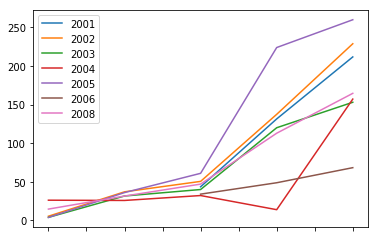

In [111]:
by_month.plot.line()

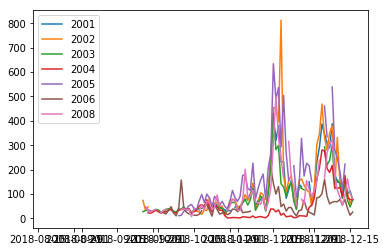

In [112]:
by_day.plot.line()

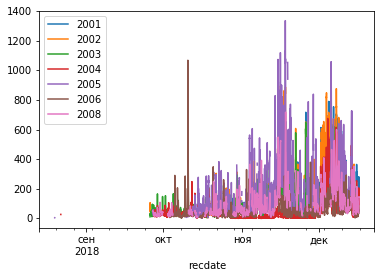

In [113]:
avg_twenty.plot.line()

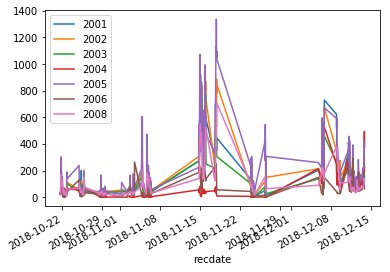

In [124]:
avg_twenty_without_null.plot.line()

In [133]:
sns.FacedGrid(by_month)

AttributeError: module 'seaborn' has no attribute 'FacedGrid'

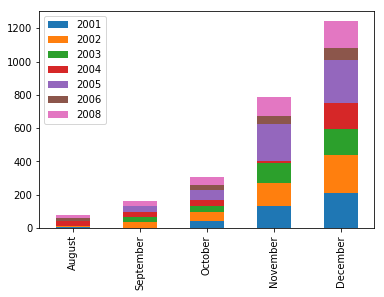

In [114]:
by_month.plot.bar(stacked = True)

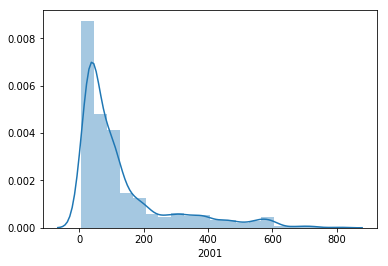

In [130]:
sns.distplot(avg_twenty_without_null['2001'], bins = 20, kde = True )

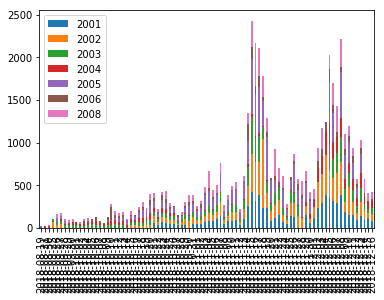

In [115]:
by_day.plot.bar(stacked = True)

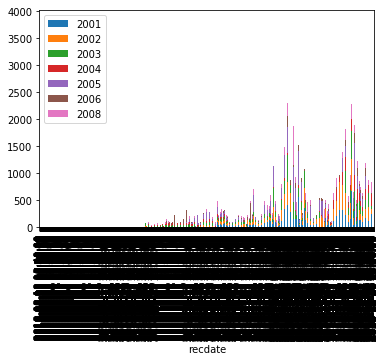

In [116]:
avg_twenty.plot.bar(stacked = True)

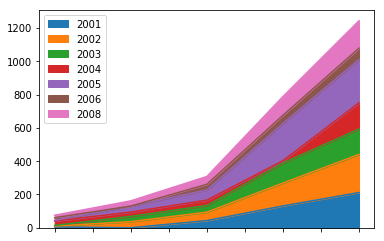

In [117]:
by_month.plot.area()

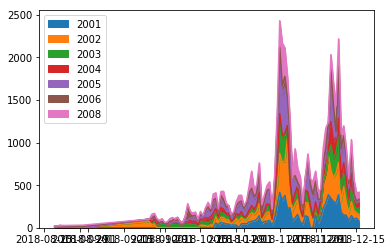

In [118]:
by_day.plot.area()

In [119]:
by_day.describe()

,2001,2002,2003,2004,2005,2006,2008
count,55.000000,67.000000,77.000000,82.000000,64.000000,67.000000,71.000000
mean,137.862628,141.663548,85.238447,49.241905,162.018474,48.387272,105.413840
std,110.162641,145.284963,80.856107,62.645803,144.950695,40.091943,95.213385
min,5.111111,5.375000,3.875000,2.025471,3.823529,9.267875,7.604017
25%,54.249939,50.529750,35.398836,9.950023,63.016381,22.950041,37.354171
50%,99.651982,85.317539,51.444056,27.272591,114.873477,34.999305,70.487839
75%,169.316156,158.760742,117.160405,50.694573,217.669306,59.284145,129.442515
max,416.010446,812.054054,431.200974,280.672257,633.887678,209.480663,500.636943


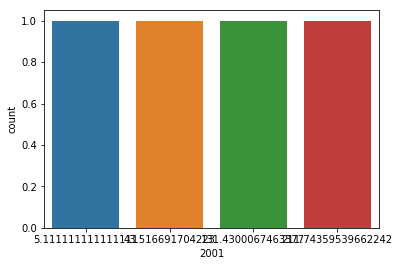

In [123]:
sns.countplot(by_month['2001'])